In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.options.display.max_columns=None

In [2]:
df = pd.read_csv('../archivos_editados/df_limpio.csv', index_col = 0)

In [3]:
df_filtrado = df[['edad', 'genero', 'tamaño_empresa', 'tiempo_cod', 'salarios', 'lenguaje_cod']]
df_filtrado['lenguaje_cod']= df_filtrado['lenguaje_cod'].str.split(',')
df_filtrado = df_filtrado.explode('lenguaje_cod')

/tmp/ipykernel_4914/1458750803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['lenguaje_cod']= df_filtrado['lenguaje_cod'].str.split(',')


In [4]:
df_filtrado.head()

,edad,genero,tamaño_empresa,tiempo_cod,salarios,lenguaje_cod
0,50-54,Man,Enorme,+10,medio,Python
0,50-54,Man,Enorme,+10,medio,SQL
1,22-24,Nonbinary,Grande,1-3,NaN,R
2,30-34,Woman,Pequeña,3-10,medio,Python
3,22-24,Man,Pequeña,1-3,bajo,Python


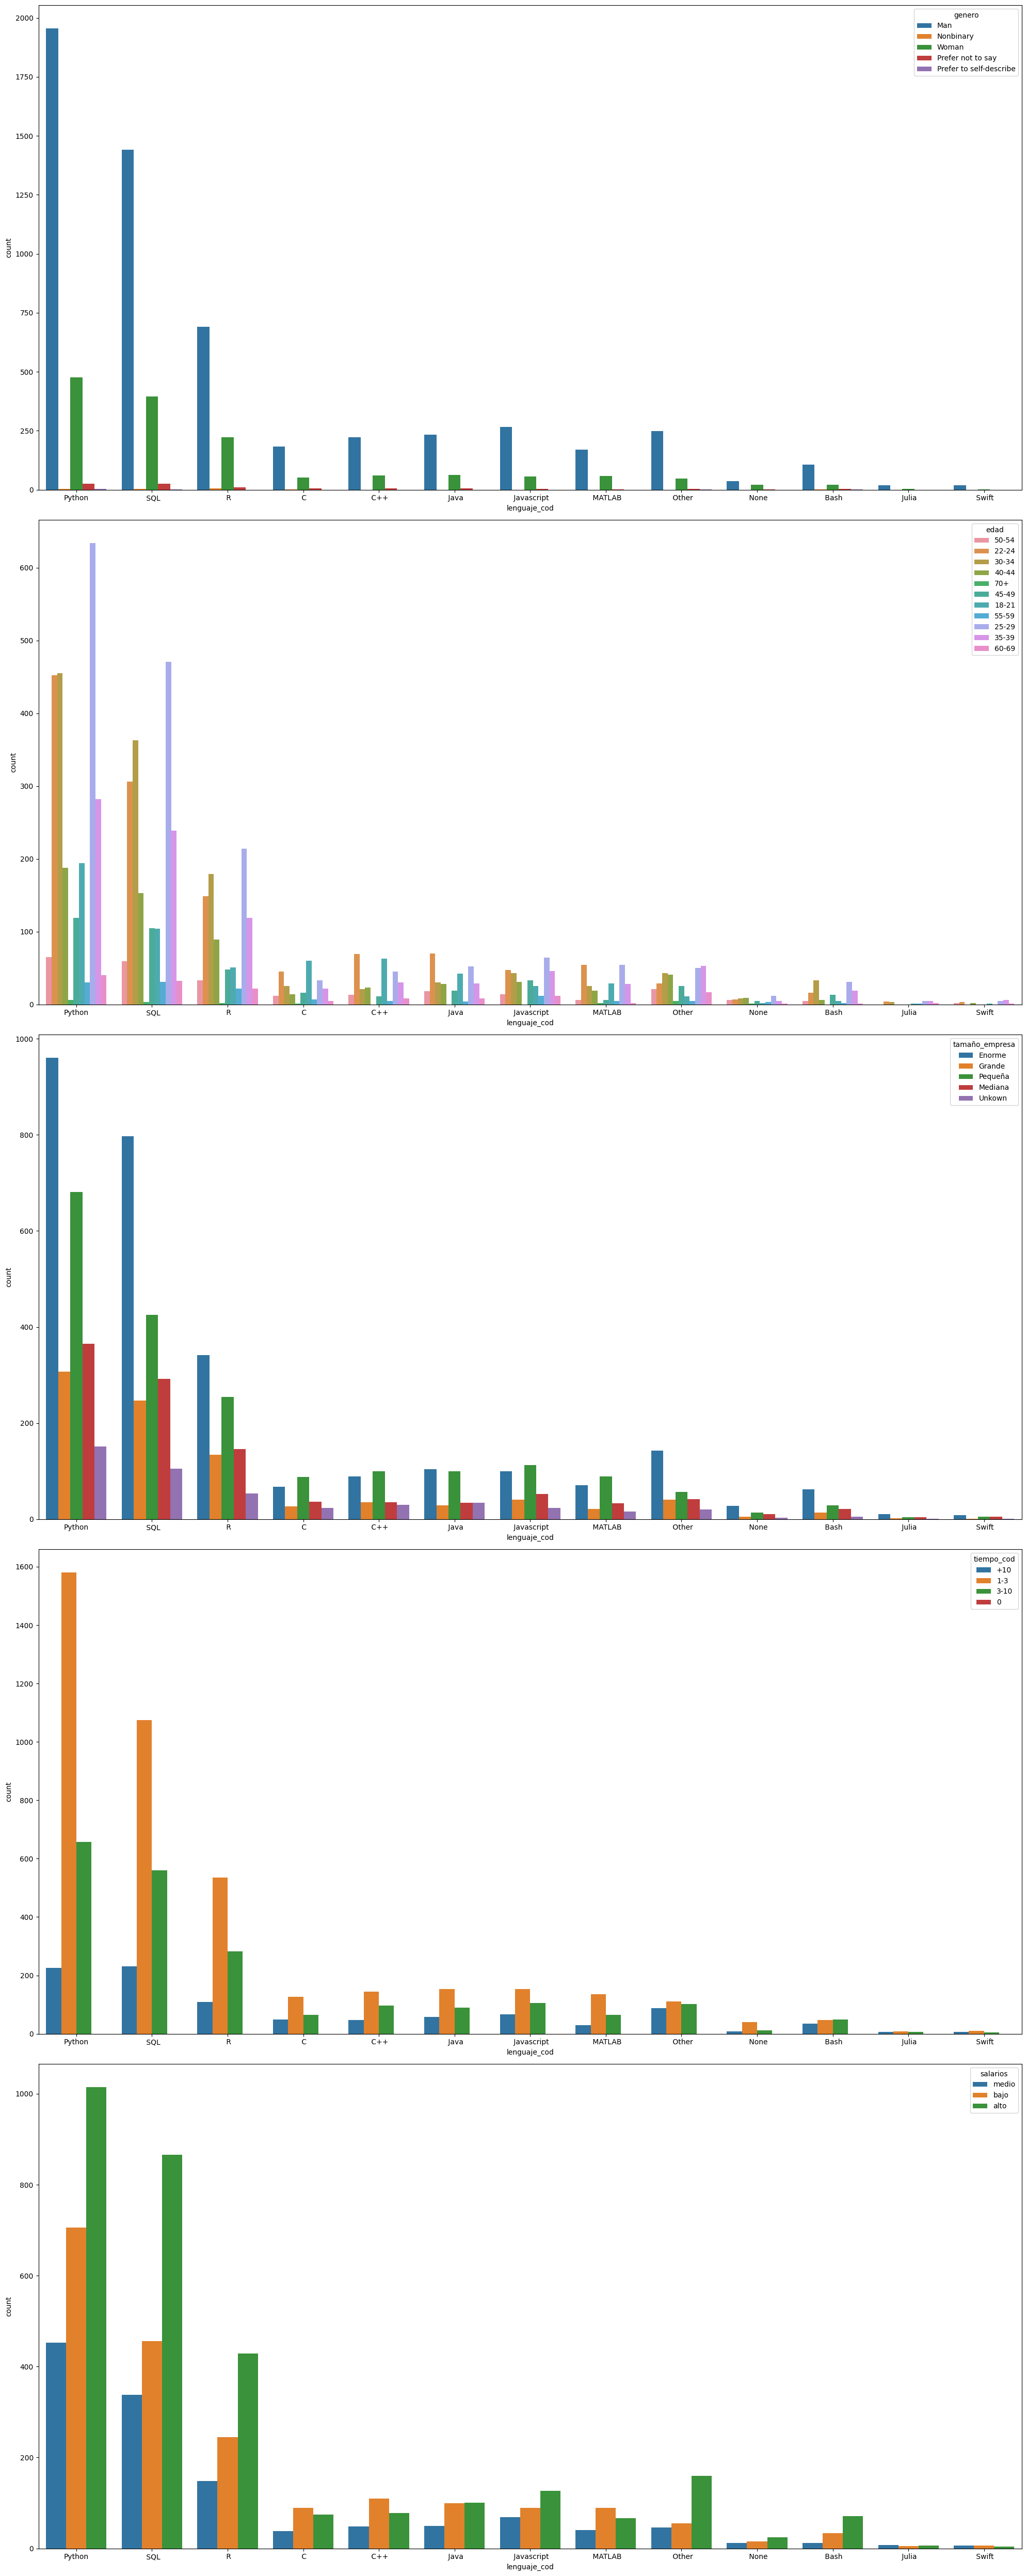

In [5]:
fig, axes = plt.subplots(5,1, figsize = (20,50))
sns.countplot(x = 'lenguaje_cod', data = df_filtrado, hue = 'genero', ax = axes[0])
sns.countplot(x = 'lenguaje_cod', data = df_filtrado, hue = 'edad', ax = axes[1])
sns.countplot(x = 'lenguaje_cod', data = df_filtrado, hue = 'tamaño_empresa', ax = axes[2])
sns.countplot(x = 'lenguaje_cod', data = df_filtrado, hue = 'tiempo_cod', ax = axes[3])
sns.countplot(x = 'lenguaje_cod', data = df_filtrado, hue = 'salarios', ax = axes[4])

plt.tight_layout()

In [6]:
df_filtrado2 = df[['edad', 'genero', 'tamaño_empresa', 'tiempo_cod', 'salarios', 'len_recom']]


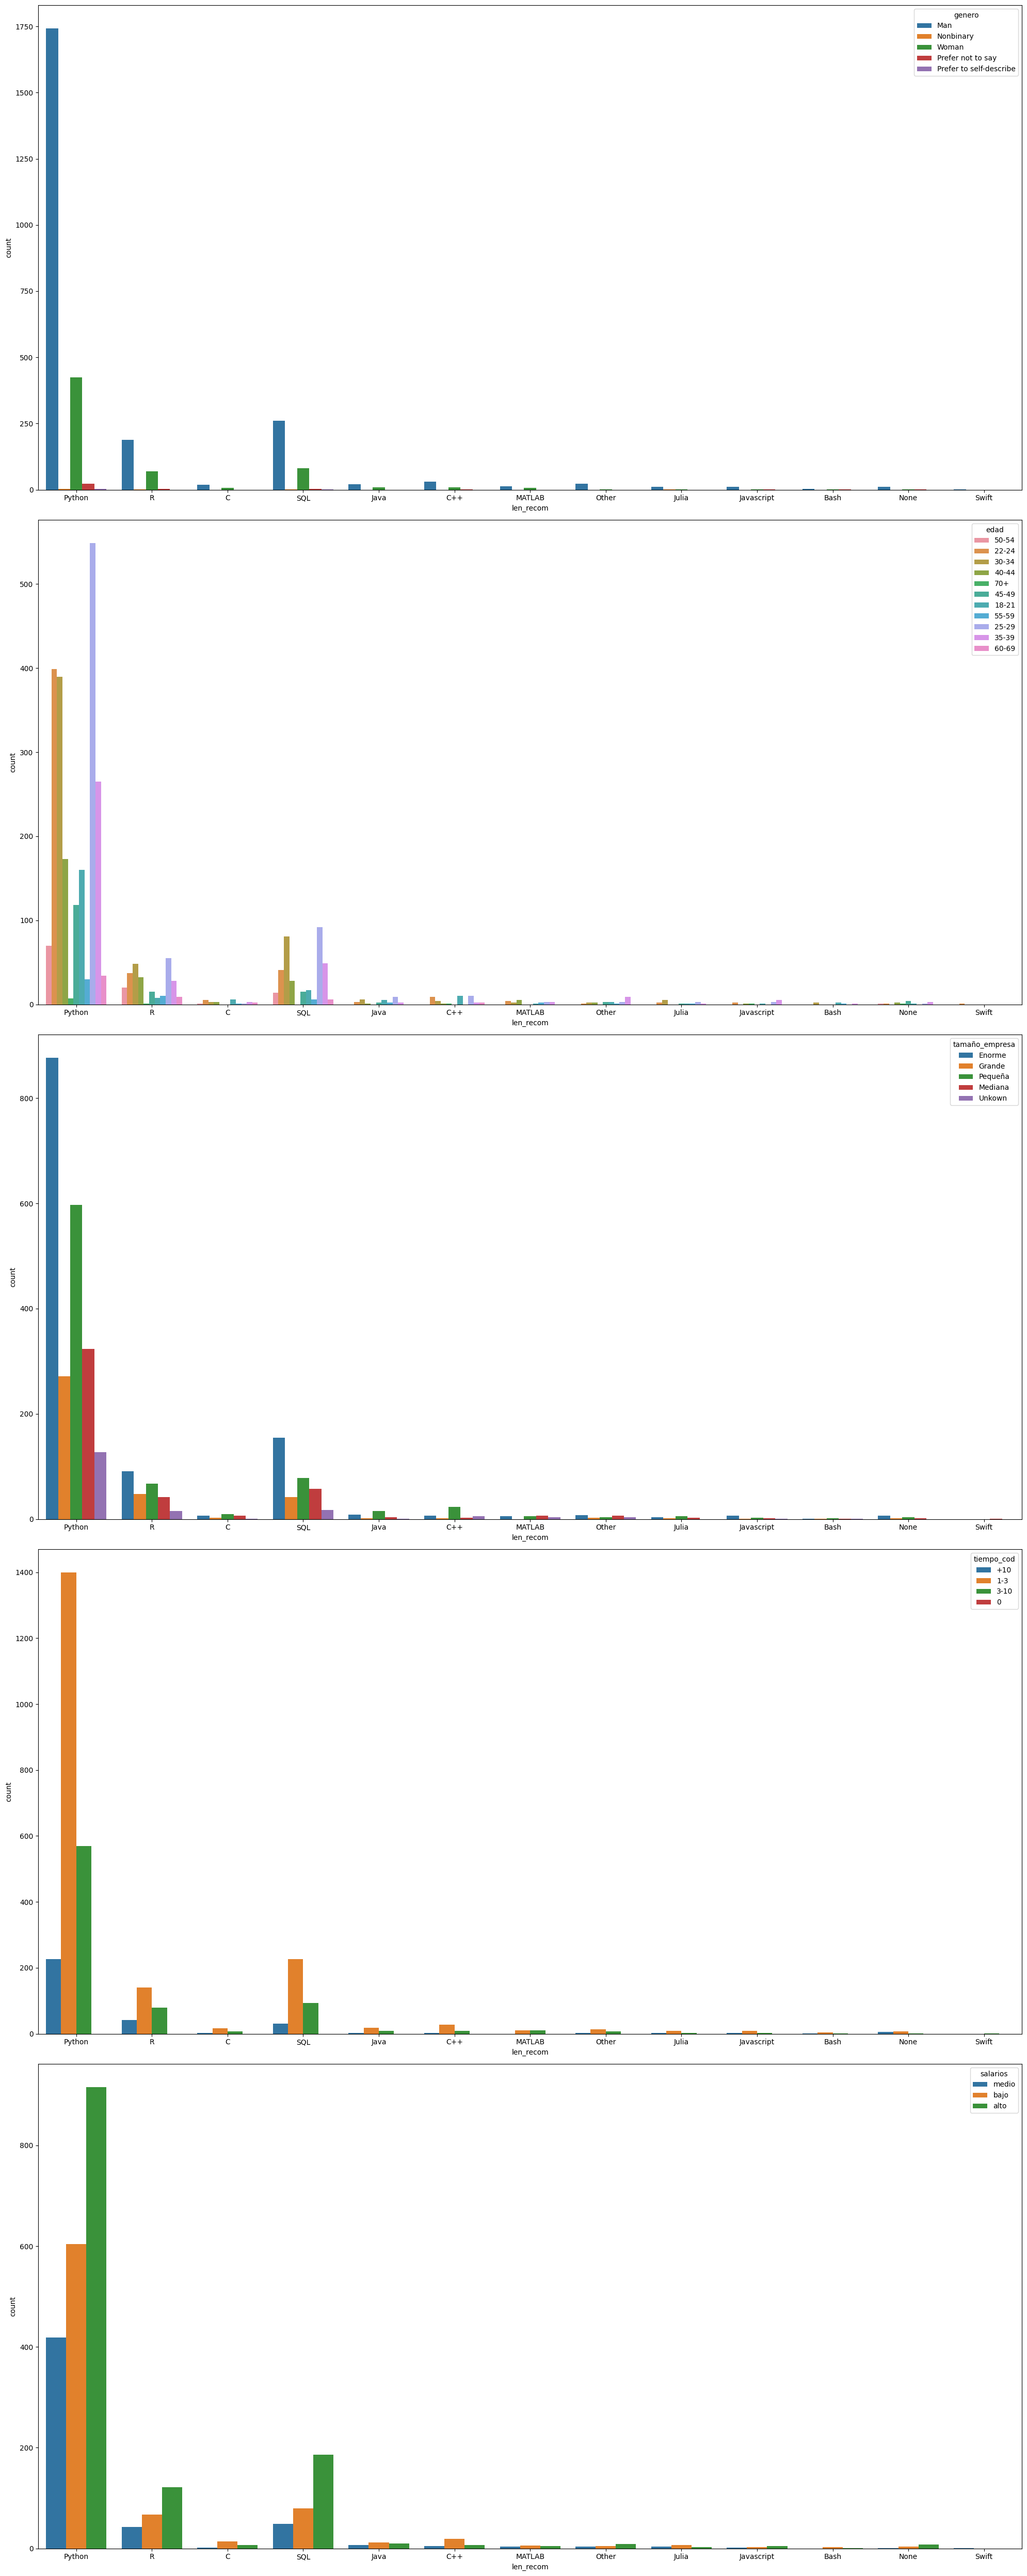

In [7]:
fig, axes = plt.subplots(5,1, figsize = (20,50))
sns.countplot(x = 'len_recom', data = df_filtrado2, hue = 'genero', ax = axes[0])
sns.countplot(x = 'len_recom', data = df_filtrado2, hue = 'edad', ax = axes[1])
sns.countplot(x = 'len_recom', data = df_filtrado2, hue = 'tamaño_empresa', ax = axes[2])
sns.countplot(x = 'len_recom', data = df_filtrado2, hue = 'tiempo_cod', ax = axes[3])
sns.countplot(x = 'len_recom', data = df_filtrado2, hue = 'salarios', ax = axes[4])

plt.tight_layout()

In [8]:
df.head()

,edad,genero,pais,nivel_estudios,tipo_trabajo,tiempo_cod,len_recom,tiempo_use_ML,sector_empresa,tamaño_empresa,uso_ML,salario,BBDD,herramientas_BI,herramienta_principal,lenguaje_cod,entorno_ID,librerias,librerias_ML,algoritmos_ML,actividades_trabajo,herramientas_BI2,salario_minimo,salario_maximo,media_salario,salarios
0,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,+10,Python,1-2 years,Energy/Mining,Enorme,We are exploring ML methods (and may one day p...,"2,000-2,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,2000.0,2999.0,2499.5,medio
1,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,1-3,R,I do not use machine learning methods,Manufacturing/Fabrication,Grande,NaN,NaN,NaN,NaN,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-10,R,I do not use machine learning methods,Non-profit/Service,Pequeña,No (we do not use ML methods),"7,500-9,999",NaN,None,"Basic statistical software (Microsoft Excel, G...",Python,"Notepad++,Jupyter Notebook",None,NaN,NaN,Analyze and understand data to influence produ...,NaN,7500.0,9999.0,8749.5,medio
3,22-24,Man,China,Some college/university study without earning ...,Data Analyst,1-3,Python,1-2 years,Computers/Technology,Pequeña,No (we do not use ML methods),0-999,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,0.0,999.0,499.5,bajo
4,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3,R,1-2 years,Manufacturing/Fabrication,Grande,No (we do not use ML methods),"25,000-29,999",NaN,Microsoft Power BI,"Local development environments (RStudio, Jupyt...","R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny","Caret ,Tidymodels","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,25000.0,29999.0,27499.5,alto


In [9]:
df["entorno_ID"].unique()

array(['Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook',
       'RStudio ', ' Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,Visual Studio Code (VSCode) ,PyCharm ,MATLAB ,Jupyter Notebook',
       'RStudio ,Jupyter Notebook', 'PyCharm , Other', 'PyCharm , Spyder',
       ' Spyder,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,PyCharm ,Jupyter Notebook',
       'Visual Studio Code (VSCode) , Sublime Text,Jupyter Notebook',
       'Jupyter Notebook', ' None', 'Jupyter Notebook, Other',
       'Visual Studio ,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,Jupyter Notebook',
       nan, 'PyCharm , Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,PyCharm , Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio , Spyder',
       ' Spyder',
       'Jupyter (Jupyte

In [10]:
x='Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook'
re.sub("\(.*\)", "",x)

'Jupyter  ,Jupyter Notebook'

In [11]:
df["entorno_ID"] = df["entorno_ID"].apply(lambda data:re.sub("\(.*\)", "",data) if type(data)== str else np.nan)

In [12]:
df['entorno_ID'] = df['entorno_ID'].str.split(',')

In [13]:
df_filtrado4 = df[['edad', 'genero', 'tamaño_empresa', 'tiempo_cod', 'salarios', 'entorno_ID']]

df_filtrado4 = df_filtrado4.explode('entorno_ID')

In [14]:
df_filtrado4['entorno_ID'].unique()

array(['Jupyter  ', 'Jupyter Notebook', 'RStudio ', ' Notepad++',
       'PyCharm ', 'MATLAB ', ' Other', ' Spyder', 'Visual Studio Code  ',
       ' Sublime Text', ' None', 'Visual Studio ', nan, ' Vim / Emacs'],
      dtype=object)

In [15]:
df_filtrado4['entorno_ID'] = df_filtrado4['entorno_ID'].str.strip()

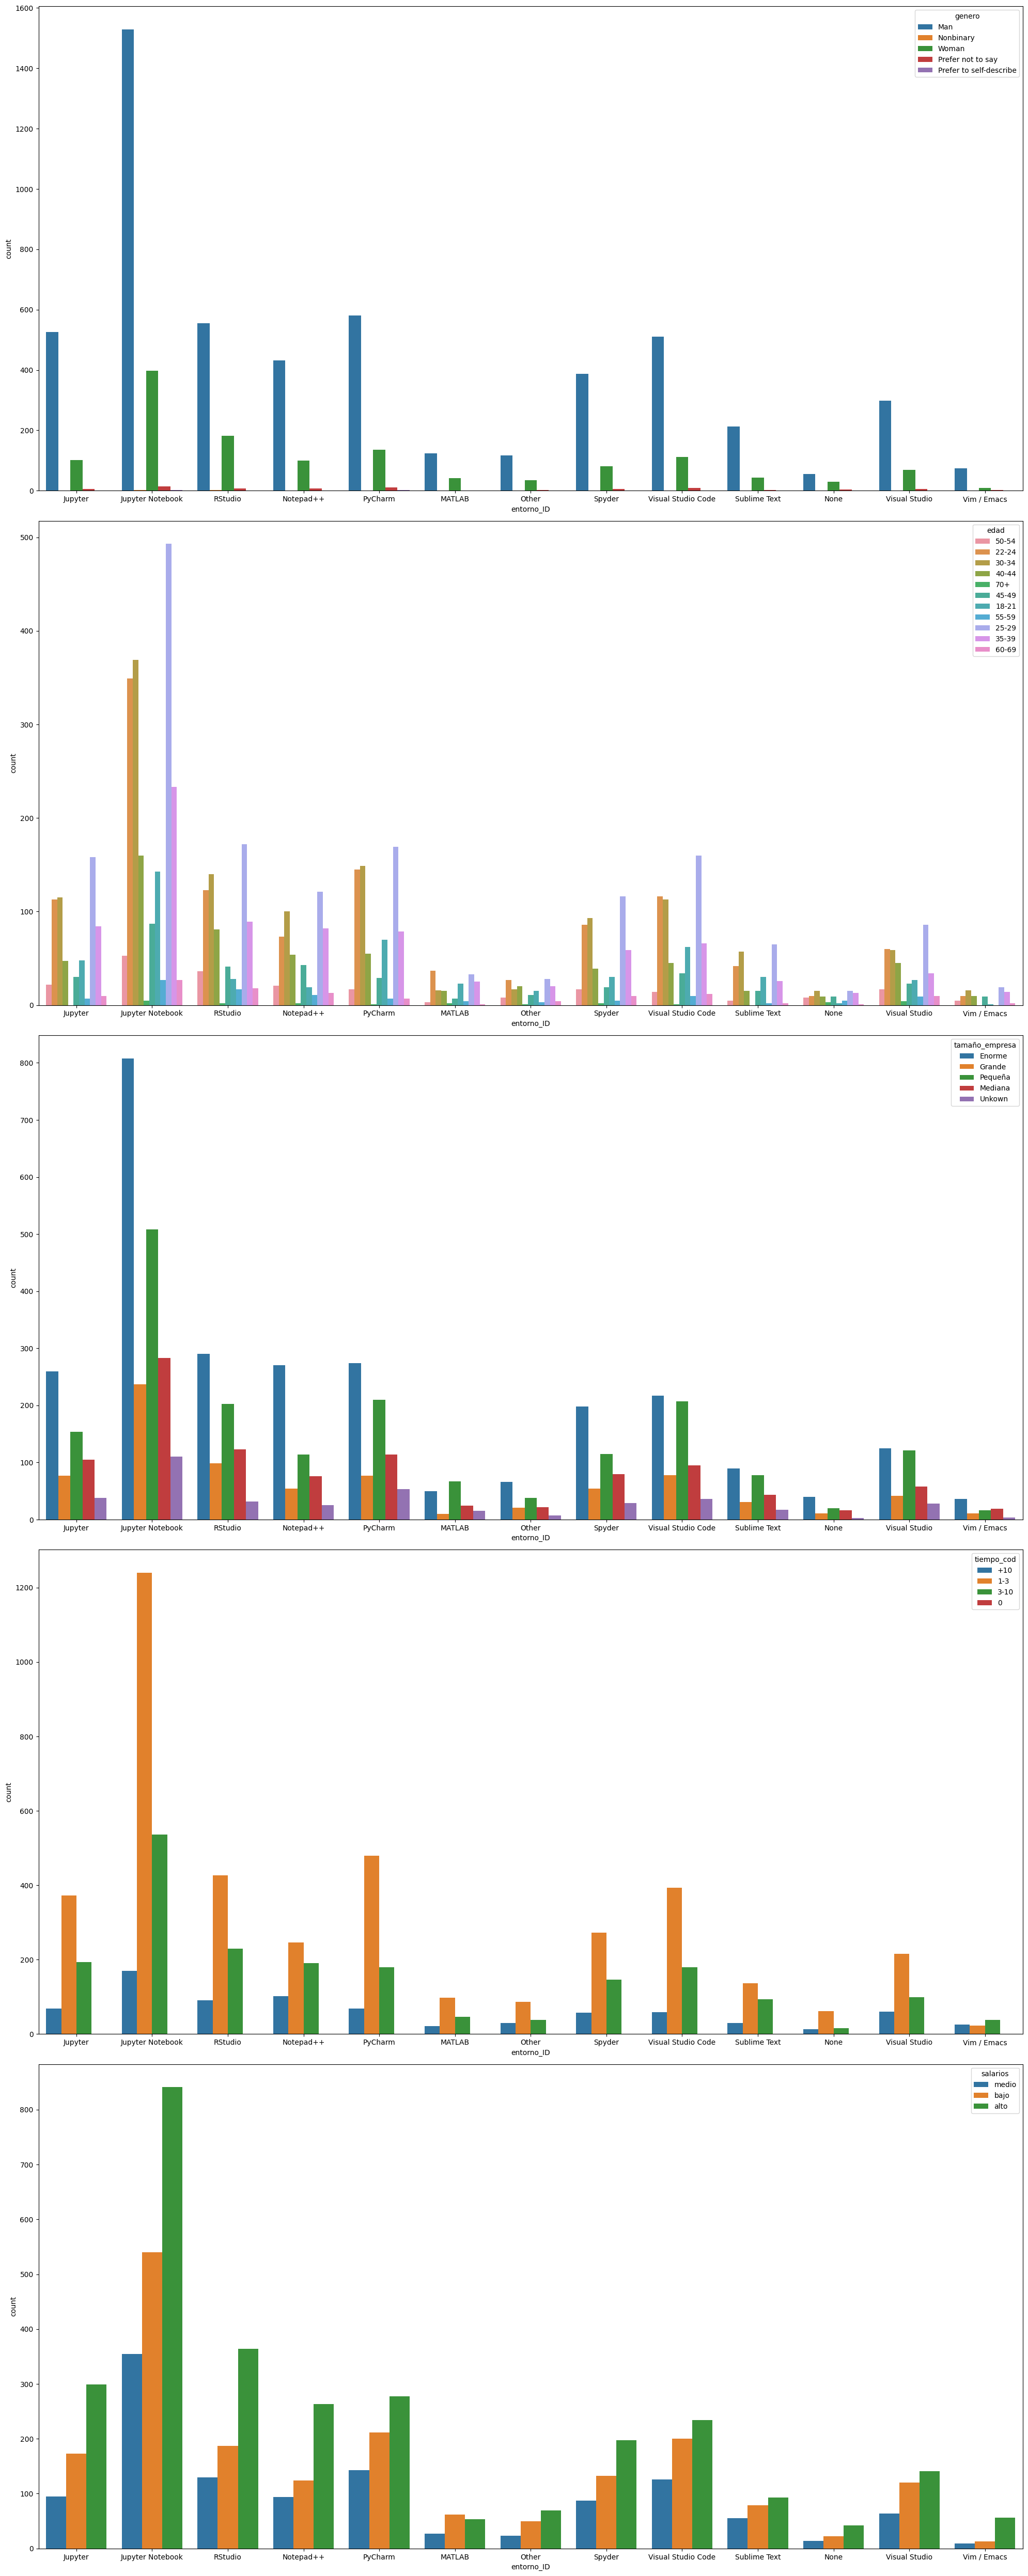

In [16]:
fig, axes = plt.subplots(5,1, figsize = (20,50))
sns.countplot(x = 'entorno_ID', data = df_filtrado4, hue = 'genero', ax = axes[0])
sns.countplot(x = 'entorno_ID', data = df_filtrado4, hue = 'edad', ax = axes[1])
sns.countplot(x = 'entorno_ID', data = df_filtrado4, hue = 'tamaño_empresa', ax = axes[2])
sns.countplot(x = 'entorno_ID', data = df_filtrado4, hue = 'tiempo_cod', ax = axes[3])
sns.countplot(x = 'entorno_ID', data = df_filtrado4, hue = 'salarios', ax = axes[4])

plt.tight_layout()

In [17]:
df_filtrado5 = df[['edad', 'genero', 'tamaño_empresa', 'tiempo_cod', 'salarios', 'librerias']]

df_filtrado5.head()

,edad,genero,tamaño_empresa,tiempo_cod,salarios,librerias
0,50-54,Man,Enorme,+10,medio,"Matplotlib ,Seaborn ,Plotly / Plotly Express"
1,22-24,Nonbinary,Grande,1-3,NaN,Ggplot / ggplot2
2,30-34,Woman,Pequeña,3-10,medio,None
3,22-24,Man,Pequeña,1-3,bajo,"Matplotlib ,Plotly / Plotly Express"
4,40-44,Man,Grande,1-3,alto,"Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny"


In [18]:
df_filtrado5["librerias"] = df_filtrado5["librerias"].str.split(",")


/tmp/ipykernel_4914/947296627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado5["librerias"] = df_filtrado5["librerias"].str.split(",")


In [19]:
df_filtrado5 = df_filtrado5.explode('librerias')

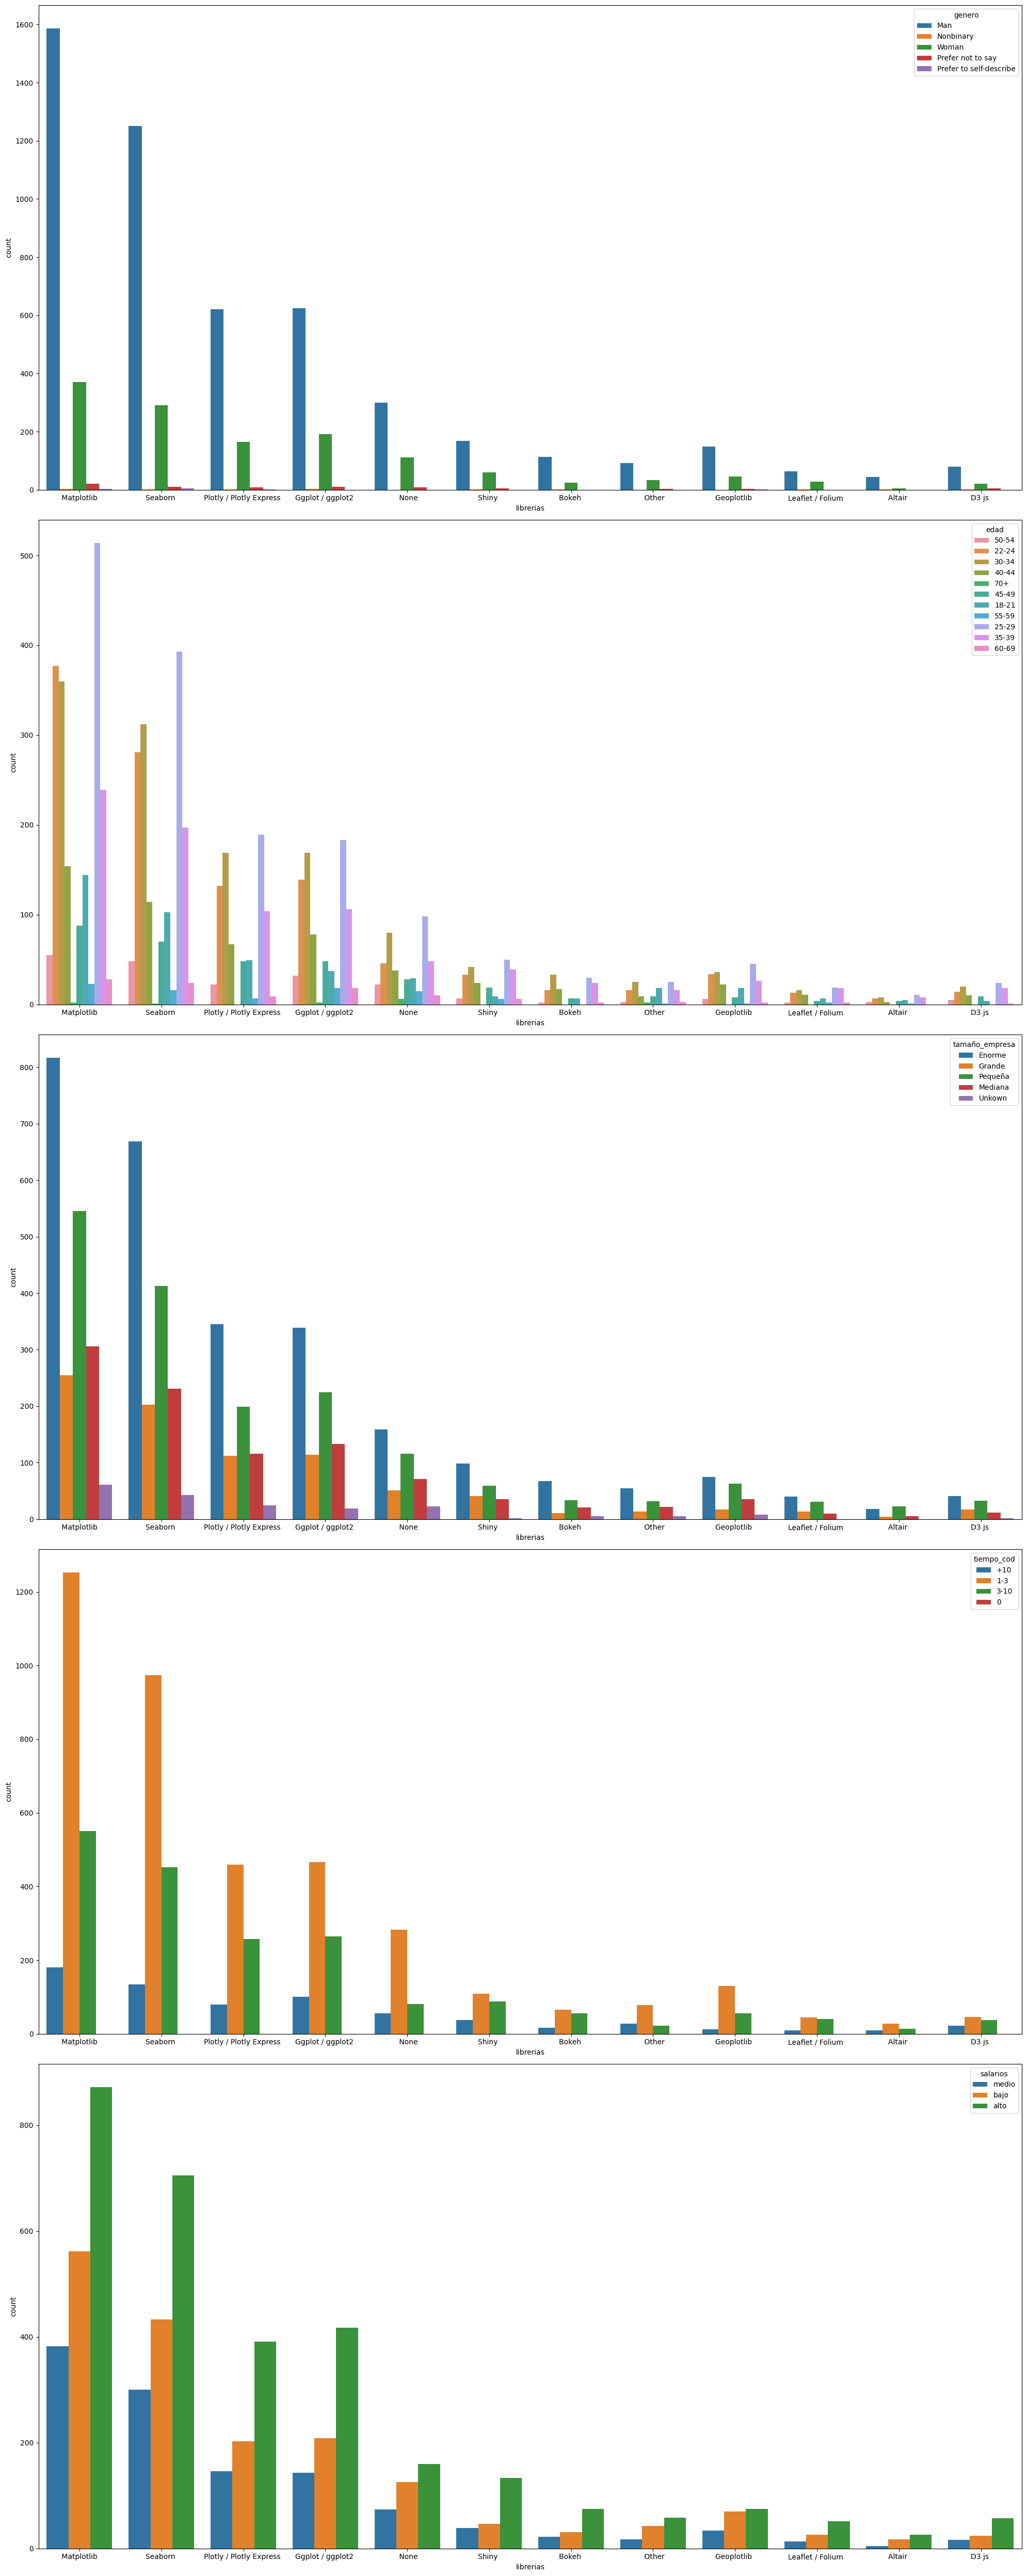

In [20]:
fig, axes = plt.subplots(5,1, figsize = (20,50))
sns.countplot(x = 'librerias', data = df_filtrado5, hue = 'genero', ax = axes[0])
sns.countplot(x = 'librerias', data = df_filtrado5, hue = 'edad', ax = axes[1])
sns.countplot(x = 'librerias', data = df_filtrado5, hue = 'tamaño_empresa', ax = axes[2])
sns.countplot(x = 'librerias', data = df_filtrado5, hue = 'tiempo_cod', ax = axes[3])
sns.countplot(x = 'librerias', data = df_filtrado5, hue = 'salarios', ax = axes[4])

plt.tight_layout()